# Finding Donors for *CharityML*
## EDA: univariate
### Kebei Jiang 05/17/2019

### Goal

The goal of this notebook is to do initial EDA of the data. More importantly, I am trying to follow this [instruction](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one) and later build my own EDA flow/template.

### Get Started

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article [_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). 

First thing first, I double checked the [origin](https://www.kaggle.com/uciml/adult-census-income) of the original dataset and made following observations.  
1. It was extracted from 1994 Census bureau database and was used as an example in aforementioned paper.  
2. The _'fnlwgt'_ feature is the number of people in full population the census takers believe that observation represents. It can be ignored for the purpose of this project.  
3. The _'census.csv'_ dataset is about the same size as the dataset used in the paper, minus some records with missing or ill-formatted entries.

-----

### 0, data head and description

In [14]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries for visulization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

In [2]:
# Load the Census dataset
data = pd.read_csv("census.csv")

display(data.head(n=5))
display(data.describe())
print('Raw data has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Raw data has 45222 rows and 14 columns.


**observation**: no missing or ill-formatted entries. no cleansing needed.

-------

### 1, Variable Identification

In [362]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [3]:
for col in data.columns.values:
    print('{} has {} unique values:\n {}\n '.format(col, data[col].nunique(), data[col].unique()))

age has 74 unique values:
 [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
 
workclass has 7 unique values:
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
 
education_level has 16 unique values:
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
 
education-num has 16 unique values:
 [13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.]
 
marital-status has 7 unique values:
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 
occupation has 14 unique values:
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'

In [4]:
ft_num = data.select_dtypes(include=['int64','float64']).columns.values
ft_cat = data.select_dtypes(exclude=['int64','float64']).columns.values

#print(ft_num)
#print(ft_cat)

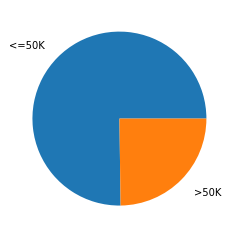

count     45222
unique        2
top       <=50K
freq      34014
Name: income, dtype: object

In [11]:
u, u_count = np.unique(data['income'], return_counts=True)
plt.pie(u_count, labels=['<=50K', '>50K'], pctdistance=1.1, labeldistance=1.2)
plt.show()
data['income'].describe()

**observation**:  
 * skewed target variable, need to pay attetion to the skewness while modeling

-------

 ### 2a, Univariate Analysis: continuous

In [8]:
print('numerical features are: {}'.format(ft_num))

numerical features are: ['age' 'education-num' 'capital-gain' 'capital-loss' 'hours-per-week']


### ages

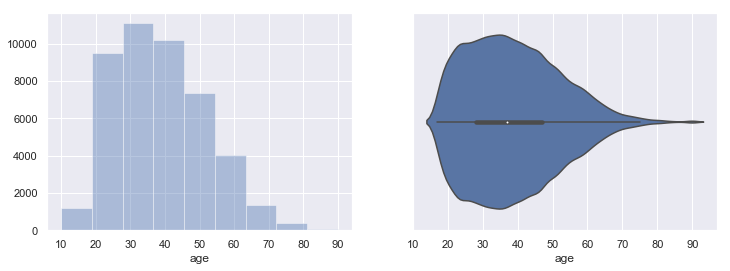

In [33]:
# displot when the variable is continuous

fig = plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.distplot(data['age'], bins=np.linspace(10, 90, 10), kde=False)
plt.subplot(122)
sns.violinplot(data['age'], orient='h')
plt.show()

**observation**:  
 * population concentrates around 30~40 years old and skews towards younger end

### educations, both number and level

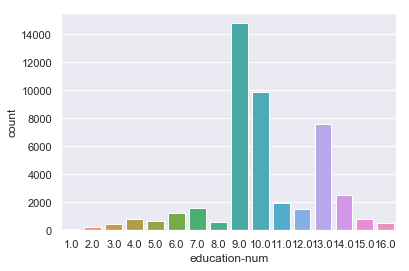

In [43]:
# countplot when the variable is categorical or discrete enough

fig = plt.figure(figsize=(6, 4))
sns.countplot(data['education-num'])
plt.show()

In [61]:
_, ct_num = np.unique(data['education-num'], return_counts=True)
_, ct_lvl = np.unique(data['education_level'], return_counts=True)
np.corrcoef(sorted(ct_num), sorted(ct_lvl))

array([[1., 1.],
       [1., 1.]])

**observation**:   
 *  _education-level_ and _education-num_ carry the same information, can drop either one.  

### capital investments

In [373]:
# can we have both gain and loss non-zero?

(data['capital-gain']*data['capital-loss']).sum()

0.0

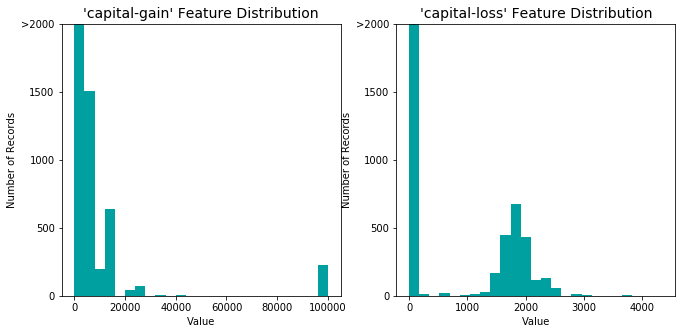

In [375]:
# Create figure
fig = plt.figure(figsize = (11,5))

# Skewed feature plotting
for i, feature in enumerate(['capital-gain','capital-loss']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(data[feature], bins = 25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

**Observations**  
 * The distribution looks extremely skewed because of the zero values.   
 * out liers exist.  
 * gain and loss are the net income from capital investment. People with zero gain and loss are simply outta market. (May consider combining these two into one, i.e., _capital = capital-gain + (-1)*capital-loss._ )  


### hours-per-week

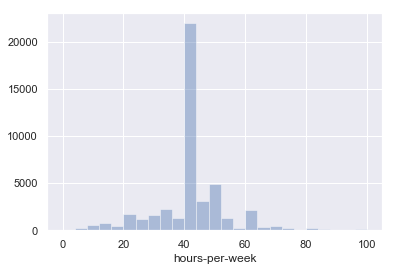

In [79]:
sns.distplot(data['hours-per-week'], bins=np.linspace(0,100, 26), kde=False)
plt.show()

**Observations**  
 * Most people working around 40 hours per week

 ### 2b, Univariate Analysis: categorical

In [22]:
ft_cat

array(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype=object)

### Wrok class

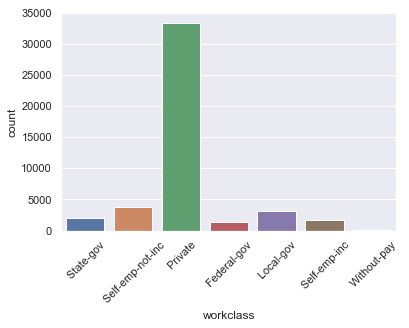

In [84]:
sns.countplot(data['workclass'])
plt.xticks(rotation=45)
plt.show()

**Observations** 

Apparently, we have a lot of 'private' workers. This give me a better understanding of the classes:  
 * 'gov' related: federal level has higher income than local and state  
 * 'private' is privately owned companies, they make up most of the population and has the 2nd lowest >50K proportion.  
 * the difference between 'self-emp-inc' and 'self-emp-not-inc' are summarized in this [article](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html).  

### marital-status

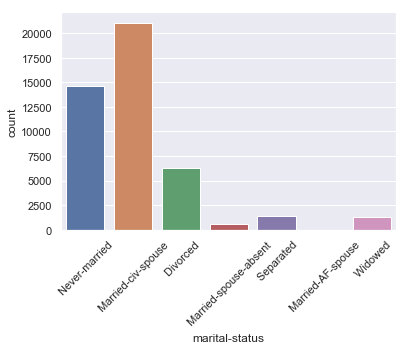

In [87]:
sns.countplot(x='marital-status', data=data)
plt.xticks(rotation=45)
plt.show()

In [90]:
# understand ' Married-spouse-absent'
data[data['marital-status']==' Married-spouse-absent'].head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
162,27,Private,HS-grad,9.0,Married-spouse-absent,Sales,Unmarried,White,Female,0.0,0.0,25.0,United-States,<=50K
322,56,Private,Assoc-acdm,12.0,Married-spouse-absent,Other-service,Not-in-family,White,Male,0.0,0.0,25.0,Iran,<=50K
337,22,Private,HS-grad,9.0,Married-spouse-absent,Sales,Not-in-family,White,Male,0.0,0.0,55.0,United-States,<=50K
400,40,Self-emp-not-inc,Bachelors,13.0,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,2174.0,0.0,40.0,United-States,<=50K


**observations**  
 * Married-AF-spouse = Armed Forces, Married-civ-spouse = Civilian   
 * see how 'Married-civ-spouse' earns way more than any other category? We are dealing with **househould** income!  
 * So the person listed is the bread winner of the household? Do we have people from the same family?

###  relationship

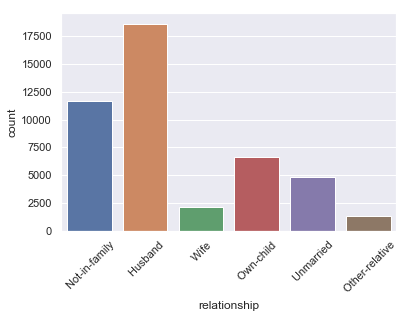

In [101]:
sns.countplot(x='relationship', data=data)
plt.xticks(rotation=45)
plt.show()

In [102]:
# understand 'own-child'
data[(data['relationship']==' Own-child')].head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
12,23,Private,Bachelors,13.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
15,25,Self-emp-not-inc,HS-grad,9.0,Never-married,Farming-fishing,Own-child,White,Male,0.0,0.0,35.0,United-States,<=50K
25,19,Private,HS-grad,9.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
29,20,Private,Some-college,10.0,Never-married,Sales,Own-child,Black,Male,0.0,0.0,44.0,United-States,<=50K
30,45,Private,Bachelors,13.0,Divorced,Exec-managerial,Own-child,White,Male,0.0,1408.0,40.0,United-States,<=50K


**Observations**  
 * People who are listed as 'Own-child' are single. 
 * 'Other-relative' might be grandparents.  
 * We can actually divide this feature into 'complete' and 'incomplete' where the former overlaps with 'Married'. Therefore we can **combine 'relationship' and 'Martial-Status'**  

###  occupation

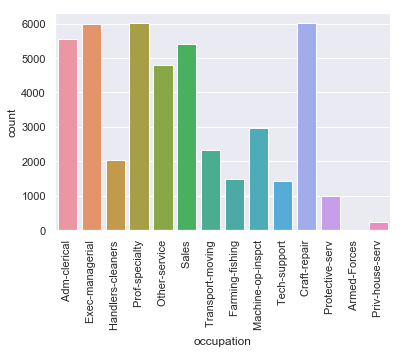

In [104]:
sns.countplot(x='occupation', data=data)
plt.xticks(rotation=90)
plt.show()

**observation**  
 * will it help to cap them with bigger groups?

###  race

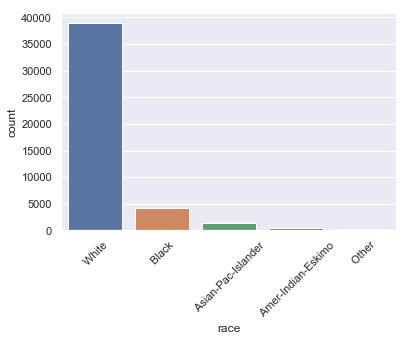

In [105]:
sns.countplot(x='race', data=data)
plt.xticks(rotation=45)
plt.show()

Where are all the **hispanics**? Let's take a look at the races of people from a latino american country.

In [106]:
data[data['native-country']==' Honduras']['race']

48        White
657       White
6413      White
6667      Black
11487     White
15704     White
16272     White
23858     White
25127     White
25274     White
25731     White
30069     White
31203     White
31861     White
35405     White
38155     White
39046     Other
39362     Black
44209     Black
Name: race, dtype: object

**Observations**  
 * 'Hispanic' is NOT considered as a race (https://en.wikipedia.org/wiki/Hispanic)
 * Current racial distribution in the US from national [demographics](https://statisticalatlas.com/United-States/Race-and-Ethnicity).   

###  Sex

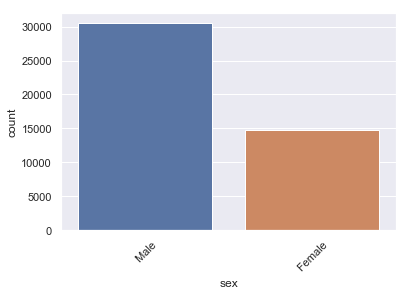

In [107]:
sns.countplot(x='sex', data=data)
plt.xticks(rotation=45)
plt.show()

**Observations**  
 * the ratio between 'Male' and 'Female' population is about 2:1

###  Native Country

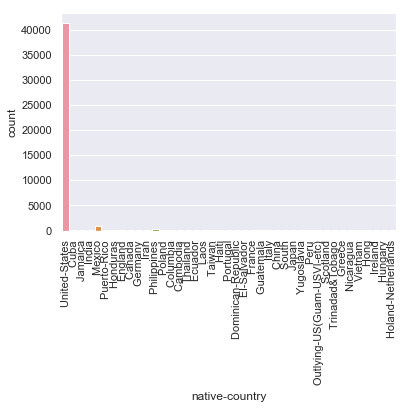

In [108]:
sns.countplot(x='native-country', data=data)
plt.xticks(rotation=90)
plt.show()

**Observations**  
 * Over 90% of the samples are US citizens  
 * The ratio of income classes are similar between people of US origin and people from all origins. 
 * The correlation between country and income is very small. It should be ok to drop this feature (and it will introduce a lot of one-hot-encode features.)

### Univariate Analysis Summary

| Step               	| Observation                                                                                                                                                                                                                       	| Idea                                                                                                                           	|
|--------------------	|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------	|
| **data overview**  	| 45222x14, 5 numerical, 9 categorical<br>no missing or ill-formated<br>target variable is skewed (~75% '<50K')                                                                                                                     	| use part of the data for balanced training?                                                                                    	|
| **ages**           	| most population falls between 30~60                                                                                                                                                  	|                                                                                                                                	|
| **education**      	| _education-level_ and _education-num_ carry the same information                                                                                              	|                                                                                                                                	|
| **capitals**       	| **net** income from capital investment<br>outliers with high gain 	| feature engineering to combine gain and loss so that we can extract more info?<br>ignore zero values or create a new category? 	|
| **hours-per-week** 	| most people work around 40 hours a week                                                                                                                                                                                                	| correlated with occupation?                                                                                                    	|
| **workclass**      	|                                                                                                                                                                                    	| 'without-pay' and no 'capital-gain' but '>50K', outlier?                                                                       	|
| **marital-status** 	| We are dealing with **househould** income                                                                                                                                                                                         	| Do we have people from the same family? It actually does NOT matter                                                                          	|
| **relationship**   	| People who are listed as 'Own-child' are single<br>'Other-relative' might be grandparents                                                                                                                                         	| may combine 'relationship' and 'Martial-Status'                                                                                	|
| **occupation**     	|                                                                                                                                                                                                                   	| combine into fewer groups?                                                                                                     	|
| **race**           	| Hispanic is not a race                                                                                                                               	|                                                                                                                                	|
| **sex**            	| ratio between male and female is 2:1                                                                                                                                                                 	| combine with martial status?                                                                                                                               	|
| **native-country** 	| over 90% are from USA                                                                                                          	| can be ignored?                                                                                                                	|

----

## Knowledge and Tricks

### plotting

 To quickly visualize distribution or frequency of some variable, `seaborn.countplot()` and `seaborn.distplot()`, former for more discrete case and latter for more continuous, work better than `plt.hist()` for several reasons:  
  * do NOT require explicity binning  
  * come with options like KDE and RUG  
  * supports HUE by class very naturally

### groupby

 * [unstack()](#another_cell)
 * https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby  
 * https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby  
 * https://stackoverflow.com/questions/33217702/groupby-in-pandas-with-different-functions-for-different-columns  
 * https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step

In [99]:
# groupby target variables and get the counts for each label
grouped = data.groupby(['relationship', 'income'])['income'].agg('count')
print(type(grouped))
display(grouped)

<class 'pandas.core.series.Series'>


relationship     income
 Husband         <=50K     10159
                 >50K       8507
 Not-in-family   <=50K     10474
                 >50K       1228
 Other-relative  <=50K      1299
                 >50K         50
 Own-child       <=50K      6521
                 >50K        105
 Unmarried       <=50K      4486
                 >50K        302
 Wife            <=50K      1075
                 >50K       1016
Name: income, dtype: int64

In [109]:
# unstack to moves the labels to columns
# so that we can count with ease
grouped = grouped.unstack()   
print(type(grouped))
display(grouped)     # print won't work here

<class 'pandas.core.series.Series'>


income  relationship   
<=50K    Husband           10159
         Not-in-family     10474
         Other-relative     1299
         Own-child          6521
         Unmarried          4486
         Wife               1075
>50K     Husband            8507
         Not-in-family      1228
         Other-relative       50
         Own-child           105
         Unmarried           302
         Wife               1016
dtype: int64